# p10_2 데이터분석 그룹화+Pivot Table


### '%' Jupyter notebook에만 있는 명령어

In [4]:
%matplotlib nbagg

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [5]:
#미국 2016년 대통령 선거 통계 자료
#미국 내 주-카운티별 ,  각 정당, 후보자의 데이터 및 득표율 데이터

primary = pd.read_csv("dataset/primary_results.csv",sep=',')
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [27]:
# primary 의 컬럼 중 fips라는 코드 식별자 통하여, 각 유권자별 데이터

countries=pd.read_csv("dataset/county_facts.csv",sep=',')
countries.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [28]:
primary.columns

Index(['state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate',
       'votes', 'fraction_votes'],
      dtype='object')

In [22]:
countries.columns

Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

## 데이터분석1:: 각 후보별 전체지역 득표수

In [23]:
#(1) 각 후보의 unique한 이름

primary['candidate'].unique()

array(['Donald Trump', 'Ted Cruz', 'Marco Rubio', 'Ben Carson',
       'John Kasich', 'Hillary Clinton', 'Bernie Sanders',
       'Carly Fiorina', 'Rand Paul', 'Mike Huckabee', 'Rick Santorum',
       'Jeb Bush', 'Chris Christie', "Martin O'Malley", ' Uncommitted',
       ' No Preference'], dtype=object)

In [30]:
#(2) 후보들을 기준으로 그룹화,득표수 계산

primary.groupby('candidate')['votes'].sum()

candidate
 No Preference         313
 Uncommitted            43
Ben Carson          528463
Bernie Sanders     4740278
Carly Fiorina        15181
Chris Christie       24347
Donald Trump       6944654
Hillary Clinton    7178257
Jeb Bush             94394
John Kasich        2456406
Marco Rubio        2998335
Martin O'Malley        747
Mike Huckabee         3300
Rand Paul             8460
Rick Santorum         1773
Ted Cruz           5248807
Name: votes, dtype: int64

In [32]:
#(3) 득표수별 오름차순 정렬

candidate_to_votes=primary.groupby('candidate')['votes'].sum().sort_values()
candidate_to_votes

candidate
 Uncommitted            43
 No Preference         313
Martin O'Malley        747
Rick Santorum         1773
Mike Huckabee         3300
Rand Paul             8460
Carly Fiorina        15181
Chris Christie       24347
Jeb Bush             94394
Ben Carson          528463
John Kasich        2456406
Marco Rubio        2998335
Bernie Sanders     4740278
Ted Cruz           5248807
Donald Trump       6944654
Hillary Clinton    7178257
Name: votes, dtype: int64

<IPython.core.display.Javascript object>


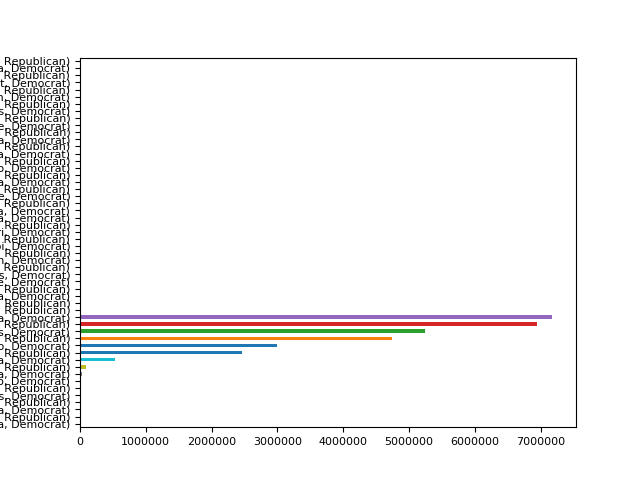

In [34]:
#(4) 시각화
candidate_to_votes.plot(kind="barh",fontsize=8)

## 데이터 분석 2 : 각 주별 공화당& 민주당의 득표 비율 계산

In [36]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


### (1) 공화당 & 민주당 득표수 계산

In [52]:
state_party_votes_s=primary.groupby(['state','party'])['votes'].sum()
state_party_votes_s

state           party     
Alabama         Democrat       381810
                Republican     805814
Arizona         Democrat       399097
                Republican     435103
Arkansas        Democrat       207182
                Republican     395108
Colorado        Democrat       121184
Florida         Democrat      1611617
                Republican    2156298
Georgia         Democrat       642420
                Republican    1232089
Idaho           Democrat        23567
                Republican     211484
Illinois        Democrat       658976
                Republican     881888
Iowa            Democrat       139682
                Republican     185508
Kentucky        Republican     225709
Louisiana       Democrat       256849
                Republican     240017
Maine           Democrat          101
Massachusetts   Democrat        51613
                Republican      31517
Michigan        Democrat      1159586
                Republican    1227909
Mississippi     Democra

### (2) 각 주의 전체 득표수를 구하기(나중에 비율을 알기 위해서)

In [3]:
state_to_votes_s=primary.groupby('state')['votes'].sum()
state_to_votes_s

NameError: name 'primary' is not defined

### (3) 득표율계산

In [66]:
state_party_to_votes_s=state_party_votes_s/state_to_votes_s
state_party_to_votes_s

state           party     
Alabama         Democrat      0.321491
                Republican    0.678509
Arizona         Democrat      0.478419
                Republican    0.521581
Arkansas        Democrat      0.343990
                Republican    0.656010
Colorado        Democrat      1.000000
Florida         Democrat      0.427721
                Republican    0.572279
Georgia         Democrat      0.342714
                Republican    0.657286
Idaho           Democrat      0.100263
                Republican    0.899737
Illinois        Democrat      0.427667
                Republican    0.572333
Iowa            Democrat      0.429540
                Republican    0.570460
Kentucky        Republican    1.000000
Louisiana       Democrat      0.516938
                Republican    0.483062
Maine           Democrat      1.000000
Massachusetts   Democrat      0.620871
                Republican    0.379129
Michigan        Democrat      0.485691
                Republican    0.51430

### (4-1) 시각화

<IPython.core.display.Javascript object>


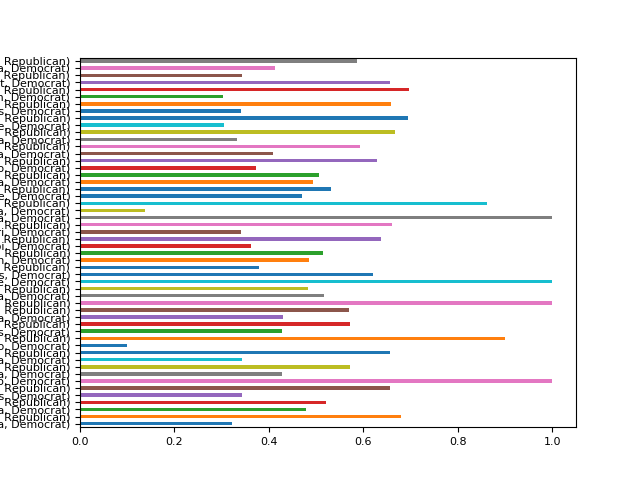

In [73]:
state_party_to_votes_s.plot(kind="barh", fontsize=8)

### (4-2) 시각화

#### unstack() : 2번째 층을 컬럼으로 올린다.

<IPython.core.display.Javascript object>


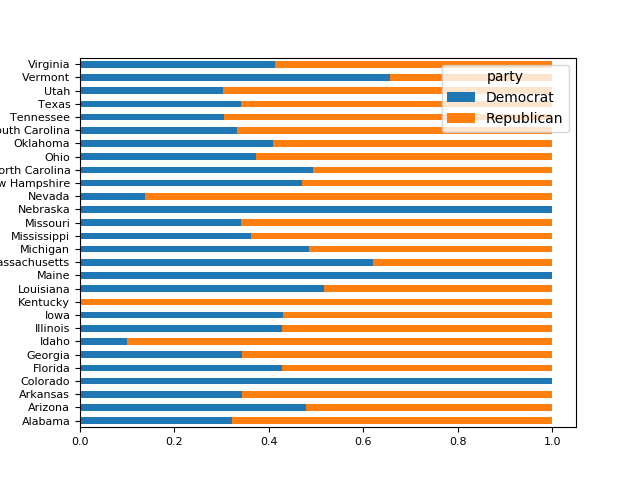

In [74]:
state_party_to_votes_s.unstack().plot(kind="barh",stacked=True, fontsize=8)

### 데이터분석3 :: pivot_table을 이용한 각 주별 당선자들의 득표수, 총합
### pivot table : 데이터를 하나 이상의 키로 수집해서 row, column 나열해서 정렬하는 요약화 도구


In [7]:
total_votes=primary.pivot_table(values='votes',
                               index='state',
                               columns='candidate',
                               aggfunc='sum', #2개의 그룹화 기준을 가지고 value에 들어갈 특정열 합
                               fill_value=0) # NaN을 0으로 처리
total_votes

candidate,No Preference,Uncommitted,Ben Carson,Bernie Sanders,Carly Fiorina,Chris Christie,Donald Trump,Hillary Clinton,Jeb Bush,John Kasich,Marco Rubio,Martin O'Malley,Mike Huckabee,Rand Paul,Rick Santorum,Ted Cruz
state,,,,,,,,,,,,,,,,
Alabama,0,0,84139,74987,0,0,356892,306823,0,37127,154379,0,0,0,0,173277
Arizona,0,0,0,163400,0,0,249916,235697,0,53040,0,0,0,0,0,132147
Arkansas,0,0,23105,64514,0,0,132546,142668,0,15079,100999,0,0,0,0,123379
Colorado,0,0,0,71928,0,0,0,49256,0,0,0,0,0,0,0,0
Florida,0,0,0,547051,0,0,1015451,1064566,0,150167,607491,0,0,0,0,383189
Georgia,0,0,78731,181760,0,0,490566,460660,0,66740,297748,0,0,0,0,298304
Idaho,0,0,0,18550,0,0,60810,5017,0,16251,34976,0,0,0,0,99447
Illinois,0,0,0,354344,0,0,350991,304632,0,153761,72233,0,0,0,0,304903
Iowa,0,43,17173,69311,3475,3278,45163,69581,5221,3466,42883,747,3300,8460,1773,51316


### 각 주별 (축약어 : state_abbreviation), 정당들의 득표율, 평균

In [10]:
primary.pivot_table(values='fraction_votes',
                               index='state_abbreviation',
                               columns='party',
                               aggfunc='mean', #2개의 그룹화 기준을 가지고 value에 들어갈 특정열 합
                               fill_value=0) # NaN을 0으로 처리

party,Democrat,Republican
state_abbreviation,,
AL,0.476823,0.195277
AR,0.464784,0.191924
AZ,0.478433,0.283867
CO,0.481016,0.000000
FL,0.469349,0.242413
GA,0.493525,0.196939
IA,0.250003,0.090857
ID,0.494733,0.240773
IL,0.489632,0.242013
